This notebook determines the input parameters for the simulated datasets.
Based on the object, we look at the diffraction overlap at the various convergence semi-angle values.
We then look into deciding on the probes and step sizes in order to reach a wide range of overlap values.

In [1]:
#%matplotlib qt
%matplotlib inline

In [2]:
import numpy as np
import hyperspy.api as hs
import os
import h5py

In [3]:
from sim_utils import *

For graphene at 80 kV below are the convergence semi-angle values and the overlap between the bf disc and the first reflection of graphene at 0.01960 rad:

| Convergence semi_angle (rad)        | Overlap in reciprocal space (%)           |
| :-------------: |:-------------:| 
| 0.008      | -22.5 | 
| 0.010      | 1.99      | 
| 0.015 | 34.70      |  
| 0.025  | 60.80     |   
| 0.032 | 69.37       |   
| 0.042 | 76.67       | 

These are corresponding to the CL aperture sizes on G-ARM in the standard STEM alignment with the exception of 10 mrad, which is included to give a small percentage overlap datapoint.


In [4]:
# function to get the obove values
get_overlap(0.042, 0.01960)

76.66666666666667

# sim starting parameters:
Accelerating voltage: 80 kV

pixelSize: 0.170 A

This gives us maximum scattering angle of 61 mrad and a detector array of 256 by 256 pixels.

Based on the above convergence semi-angle values, in each case we get two probes: 

one at zero defocus

one with maximum defocus - defined as the probe with diameter equal to half the reconstrction array, i.e. 21.775 A =  (0.170 A * 256 / 2) in this case. 

We then find the step sizes that can give us a wide range of cases:

Target probe overlap values (%): -20, 2, 35, 60, 70, 80

In [5]:
pixel_size = 0.170e-10 # in m
image_size = [256, 256]
e_0 = 80000
l = e_lambda(e_0)
print('electron wavelength (m): ', l)
conv_semi_list = [0.008, 0.010, 0.015, 0.025, 0.032, 0.042]
def_vals = [] 
probes = []

for angle in conv_semi_list:
    # 6 focussed probes
    probe = calc_probe_size(pixel_size, image_size, l, 0, angle, plot_probe= False, return_probeArr= True)
    probes.append(probe)
    def_vals.append(0)
    # defocus values
for angle in conv_semi_list:  
    # 6 defocussed probes
    print(angle)
    def_val = max_defocus(pixel_size, image_size, l, angle)
    print(def_val)
    def_vals.append(def_val)
    probe = calc_probe_size(pixel_size, image_size, l, def_val, angle, plot_probe= False, return_probeArr= True)
    probes.append(probe)

probes = np.asanyarray(probes)

electron wavelength (m):  4.175716077283421e-12
0.008
2.8169999999999557e-08
0.01
2.6149999999999096e-08
0.015
2.235999999999916e-08
0.025
1.8149999999999398e-08
0.032
1.6249999999999507e-08
0.042
1.4439999999999609e-08


In [6]:
def_vals

[0,
 0,
 0,
 0,
 0,
 0,
 2.8169999999999557e-08,
 2.6149999999999096e-08,
 2.235999999999916e-08,
 1.8149999999999398e-08,
 1.6249999999999507e-08,
 1.4439999999999609e-08]

In [7]:
probes.shape

(12, 2)

In [8]:
conv_semi_list

[0.008, 0.01, 0.015, 0.025, 0.032, 0.042]

In [9]:
probe_overlaps = [-20, 2, 35, 60, 70, 80]
step_sizes = []
for i in np.arange(12):
    for overlap in probe_overlaps:
        step_sizes.append(get_step_size(probes[i][0], overlap / 100))


In [14]:
len(step_sizes)

72

[Text(0, 0.5, 'step size (m)'),
 Text(0.5, 1.0, 'scan step sizes for target overlap values')]

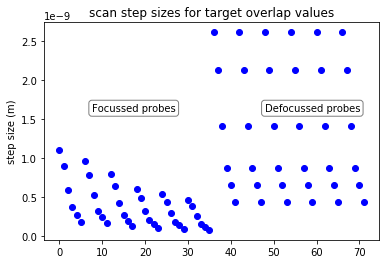

In [10]:
fig, ax = plt.subplots()

ax.plot(step_sizes, 'bo')

ax.annotate('Focussed probes', xy=(15, 1.6e-9),
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, 5e-10), textcoords='offset points', ha='center')
ax.annotate('Defocussed probes', xy=(45, 1.6e-9),
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(60, 5e-10), textcoords='offset points', ha='center')
ax.set(title='scan step sizes for target overlap values',
       ylabel='step size (m)')

Text(0.5, 0, 'sim conditions')

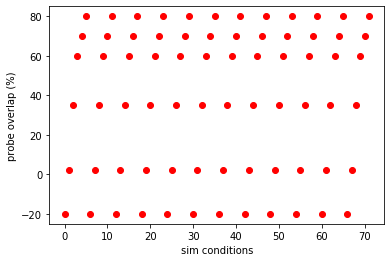

In [15]:
probe_overlaps_all = probe_overlaps * 12
plt.plot(probe_overlaps_all, 'ro')
plt.ylabel('probe overlap (%)')
plt.xlabel('sim conditions')

Text(0.5, 0, 'sim conditions')

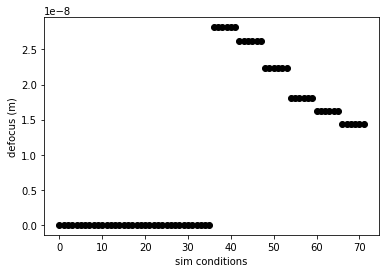

In [16]:
def_vals_all = [y for x in def_vals for y in (x,)*6]
plt.plot(def_vals_all, 'ko')
plt.ylabel('defocus (m)')
plt.xlabel('sim conditions')

Text(0.5, 0, 'sim conditions')

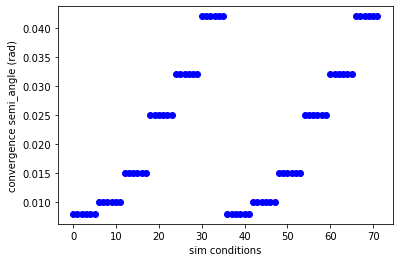

In [17]:
conv_semi_all = [y for x in conv_semi_list for y in (x,)*6] * 2
plt.plot(conv_semi_all, 'bo')
plt.ylabel('convergence semi_angle (rad)')
plt.xlabel('sim conditions')

In [18]:
conv_semi_all = np.asarray(conv_semi_all)
def_vals_all = np.asarray(def_vals_all)
step_sizes = np.asarray(step_sizes)
sim_conditions = np.vstack((conv_semi_all, def_vals_all, step_sizes))

In [19]:
sim_conditions[:,0]
# convergence semi-angle (rad), defocus (m), step_size (m)

array([8.0000000e-03, 0.0000000e+00, 1.0975567e-09])

In [22]:
sim_conditions.shape

(3, 72)

In [23]:
np.save('sim_condtions', sim_conditions)